# 12. Matplotlib: adjusting non-data elements

We will see later on other types of plots that we can generate, but before that, we want to explore how we can adjust the myriad of elements of a plot: titles, axis, ticks etc.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv')

def parabola(x, a, b, c):
    return a * x**2 + b*x + c
fit_params, _ = scipy.optimize.curve_fit(parabola, diams.carat, diams.price)

## Modify the axis

The axis properties can be modified via methods attached to the ```ax``` object. For example we can set limits:

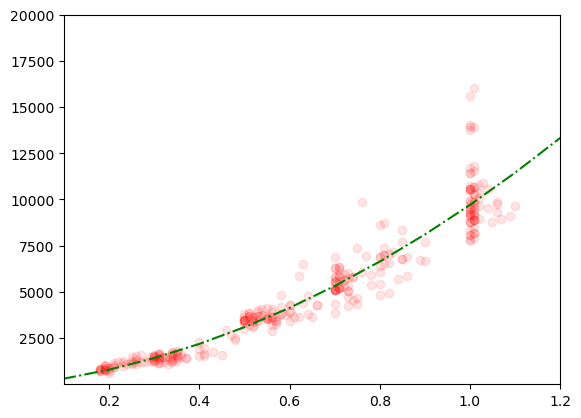

In [3]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set_xlim(left=0.1, right=1.2)
ax.set_ylim(bottom=1, top=20000);

We can also change the axis type itself. For example we can turn our plot into a log plot by changing the type of the y-axis:

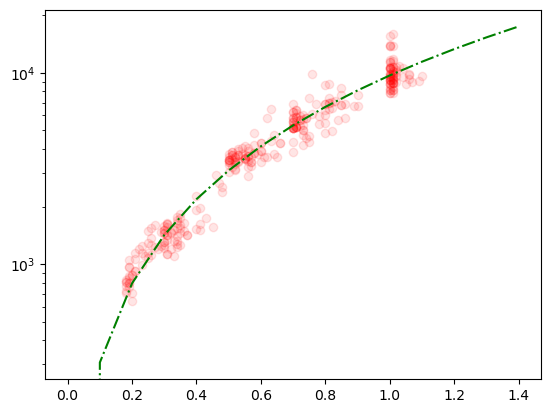

In [4]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set_yscale('log');

## Adding labels

One should always use labels for all axis. We can do this with the ```set_xlabel``` and ```set_ylabel``` methods:

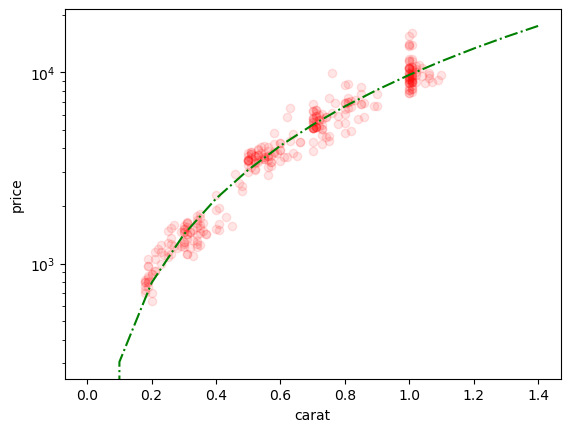

In [5]:
ax.set_xlabel('carat')
ax.set_ylabel('price')
fig

## Avoid hard-coding

Ideally you should try to hard-code too much information throughout your code. For example, you might produce several plots with the same data, and if you decide to change the labelling you want to avoid having to manually update the label in *each single* plot. Here's a possible solution: you could create a dictionary that maps a column name to a label. Whenever you want to use a specific column you then just call that dictionary for labelling!

In [6]:
label_dict = {'carat': 'Weight [ct]', 'price': 'Price [USD]'}

Now when we want to create a plot, we can set everything at the beginning:

In [7]:
x_axis = 'carat'
y_axis = 'price'

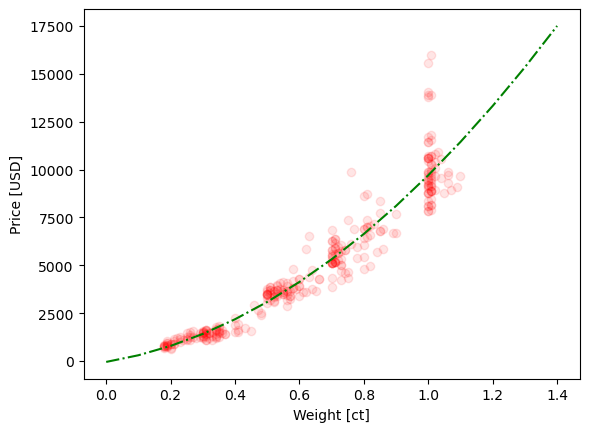

In [8]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set_xlabel(label_dict[x_axis])
ax.set_ylabel(label_dict[y_axis]);

## More advanced labels

Sometimes you want to use variables in your label, so that the label adjusts exactly to your current settting. For example, let's imagine that you want to scale your y axis by some factor. You'd like this to be represented in your label. There are different solutions to achieve this but the most "modern" one is to use ```f```-strings

In [9]:
factor = 1000

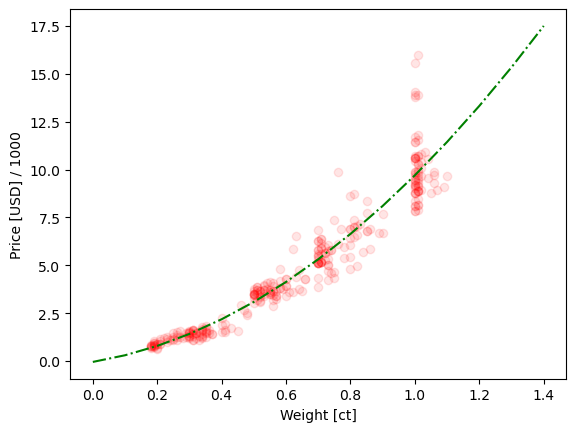

In [10]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis]/factor, 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params)/factor, linestyle='-.', color='green');
ax.set_xlabel(label_dict[x_axis])
ax.set_ylabel(f'{label_dict[y_axis]} / {factor}');

Finally if you are familiar with $\LaTeX$, you can also use it in labels, as well as for any other text. For example let's imagine we dealy with micrograms in the x axis, we could use:

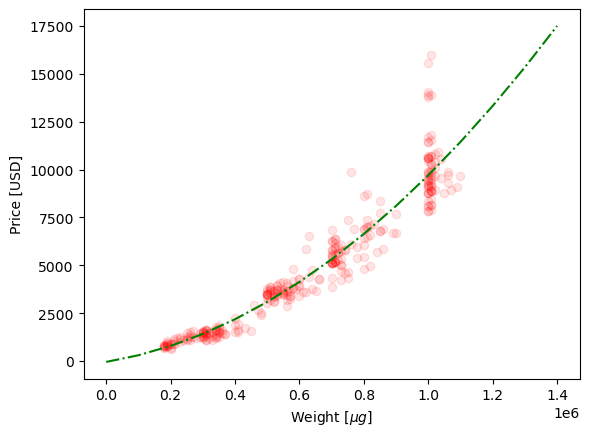

In [11]:
w_factor = 10**6
fig, ax = plt.subplots()
ax.plot(diams[x_axis]*w_factor, diams[y_axis], 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1)*w_factor, parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set_xlabel('Weight [$\mu g$]')
ax.set_ylabel(label_dict[y_axis]);

## Adding a title

You can easily add a title to your plot using the ```set_title()``` function. It has the same properties as the labels, so you can use ```f```-strings, $\LaTeX$ etc. As a general rule, beware of not repeating in the title what is alredy shown in the axis labels:


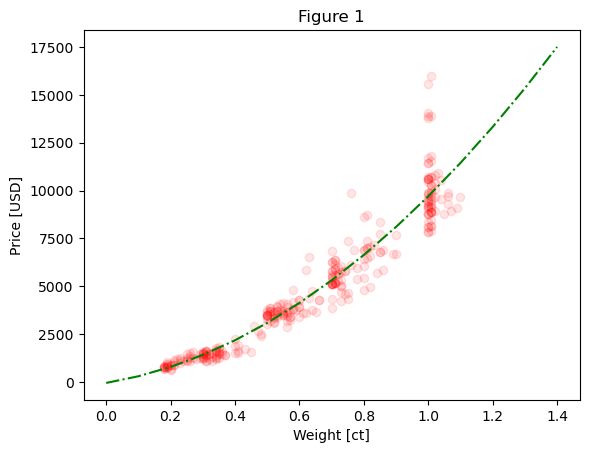

In [12]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set_xlabel(label_dict[x_axis])
ax.set_ylabel(label_dict[y_axis]);
ax.set_title('Figure 1');

## One function to set them all

Instead of calling all the different function - ```set_xlabel, set_title``` etc. you can also use the ```set_ax``` function and pass your text as parameters:

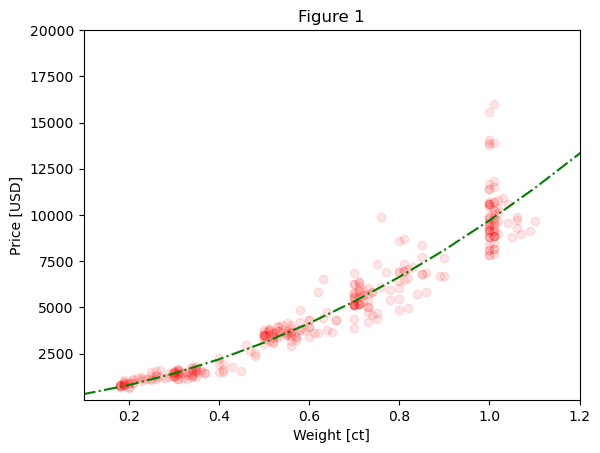

In [13]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set(xlim=(0.1, 1.2), ylim=(1, 20000), xlabel=label_dict[x_axis], ylabel=label_dict[y_axis], title='Figure 1');

## Adjusting the text itself

There are multiple ways to adjust the text in a figure. The first solution is to adjust the parameters for element in the plot using a list of [possible options](https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties) such as ```size``` or ```weight```:

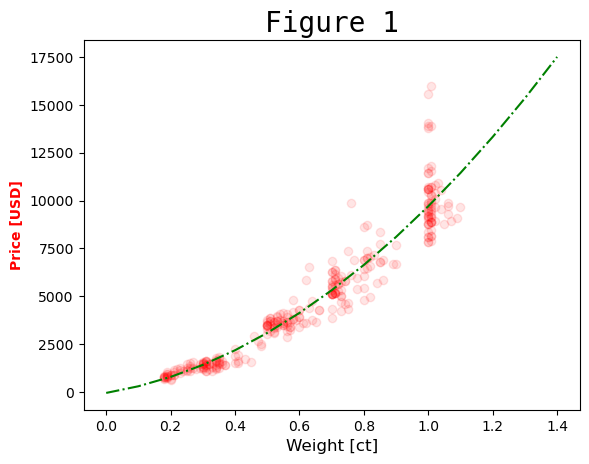

In [14]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set_xlabel(label_dict[x_axis], size=12)
ax.set_ylabel(label_dict[y_axis], weight=1000, color='red');
ax.set_title('Figure 1', family='monospace', size=20);

## Changing tick marks

The last element that we have not updated yet are the tick marks. First, let's reset the defaults (we'll come back to this later):

In [15]:
plt.style.use('default')

The main way to update tick marks is to use the ```tick_params``` function. There you have a series of options (with expected names such as color, labelsize etc) to set everything. For example:

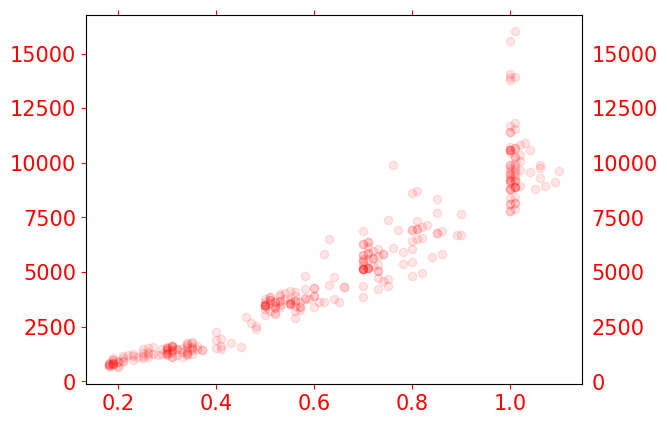

In [16]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.tick_params(colors='red',labelsize=15, top=True, labelright=True)

As you can see our options were applied to all tickmarks. We can howeve specify **which** axis we want to affect usng the ```axis``` option:

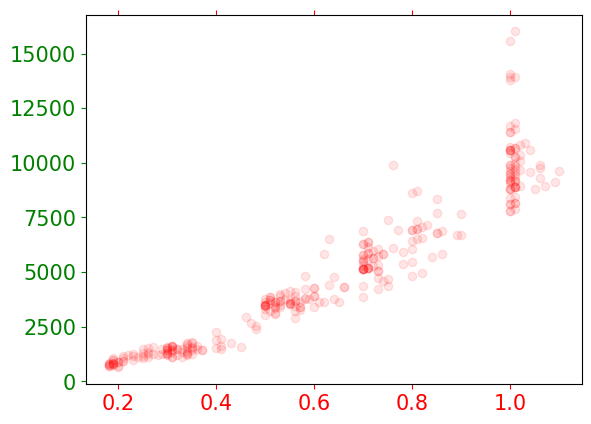

In [17]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.tick_params(axis='x', colors='red',labelsize=15, top=True, labelright=True)
ax.tick_params(axis='y', colors='green',labelsize=15)

Obviously, as we specified that we wanted to affect the x axis, the ```labelright``` option is not taken into account.

## Grid lines

Finally we can also add grid lines to our plot. This is achieved via the ```grid``` function:

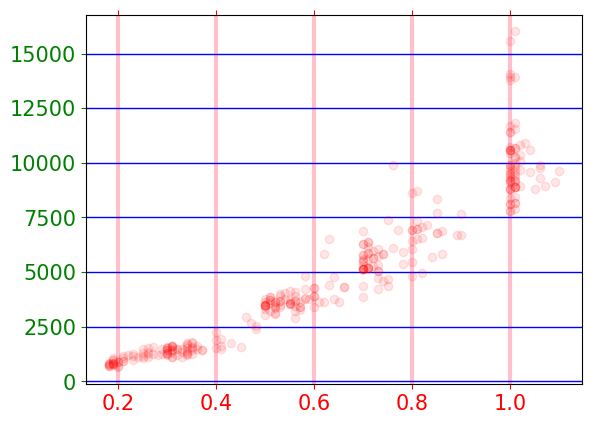

In [18]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.tick_params(axis='x', colors='red',labelsize=15, top=True, labelright=True)
ax.tick_params(axis='y', colors='green',labelsize=15)
ax.grid(which='major', axis='x', linewidth=3, color='pink')
ax.grid(which='major', axis='y', linewidth=1, color='blue')

## General templates

Instead of specifying everything manually, you can also use pre-made style templates. You can find a complete list [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Then you can use this command with the appropriate style name:


In [19]:
plt.style.use('ggplot')

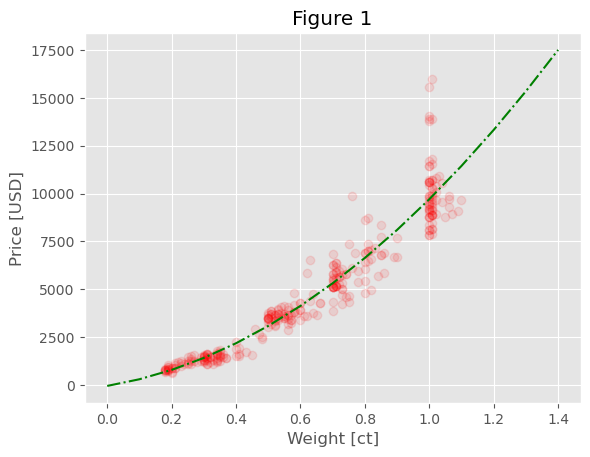

In [20]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');
ax.set_xlabel(label_dict[x_axis])
ax.set_ylabel(label_dict[y_axis]);
ax.set_title('Figure 1');

## Saving the figure

You can easily save your figure in common formats like PNG and JPG wit the ```savefig``` function attached to the ```fig``` object. As usual, there are many options to use. One of the most important ones being the resolution ```dpi```:

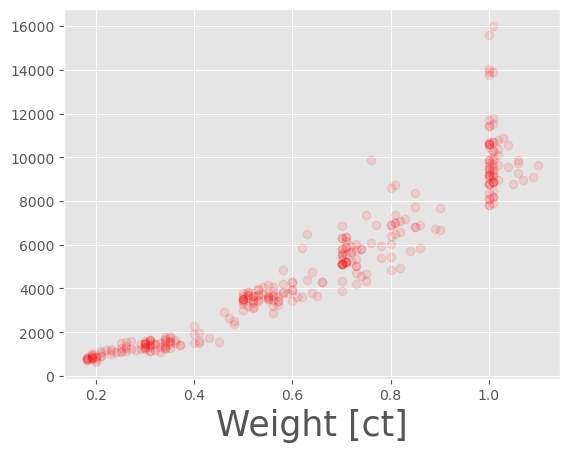

In [21]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.set_xlabel(label_dict[x_axis], size=25)

fig.savefig('myfigure.png', dpi=50)

Note that in some cases, depending on the size of your labels, Matplotlib might cut-off some of the elements on the edges (as happens above). To make sure that this doesn't happen and that you have minimal white space around your figure, you can use the very useful ```tight_layout```:

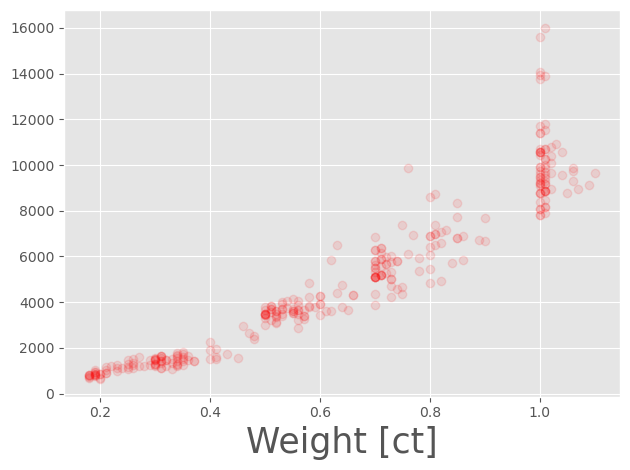

In [23]:
fig, ax = plt.subplots()
ax.plot(diams[x_axis], diams[y_axis], 'ro', alpha=0.1);
ax.set_xlabel(label_dict[x_axis], size=25)
plt.tight_layout()
fig.savefig('myfigure2.png', dpi=50)

## Exercise

1. Load the penguins data https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv

2. Using one of the scatter plots of ```body_mass_g``` as a function of ```bill_depth_mm``` (separated by specied or not), truy to customize the plot to match the example below.

3. Choose a style and apply it to your plot.

![](https://github.com/guiwitz/ISDAwPython_day2/raw/master/plots/ex_12_1.png)